In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from IPython.display import HTML
from IPython.display import display

Sure, let's prove the relationship \(\frac{\partial \log(p)}{\partial x} = \frac{1}{p} \frac{\partial p}{\partial x}\) using proper notation and step-by-step reasoning.

### Proof

Let \( p \) be a function of \( x \), i.e., \( p = p(x) \).

1. **Starting with the natural logarithm of \( p \):**
   \[
   \log(p)
   \]

2. **Applying the chain rule for differentiation:**
   - The chain rule states that if \( f \) is a composite function such that \( f = g(h(x)) \), then:
    $$
     \frac{d}{dx} f = \frac{d}{dg} \cdot \frac{dg}{dh} \cdot \frac{dh}{dx}
     $$

3. **Applying the chain rule to \(\log(p)\):**
   - Let $$ g = \log(p) \), and \( h = p(x) $$:
     $$
     \frac{d}{dx} \log(p) = \frac{d}{dp} \log(p) \cdot \frac{dp}{dx}
     $$

4. **Differentiating \(\log(p)\) with respect to \( p \):**
   - The derivative of \(\log(p)\) with respect to \( p \) is:
     $$
     \frac{d}{dp} \log(p) = \frac{1}{p}
     $$

5. **Combining the results:**
   - Substituting \(\frac{1}{p}\) for \(\frac{d}{dp} \log(p)\) and multiplying by \(\frac{dp}{dx}\):
     $$
     \frac{d}{dx} \log(p) = \frac{1}{p} \cdot \frac{dp}{dx}
     $$

### Conclusion

Thus, we have shown that:
\[
\frac{\partial \log(p)}{\partial x} = \frac{1}{p} \frac{\partial p}{\partial x}
\]

This completes the proof.

![](https://static01.nyt.com/images/2019/12/17/science/02TB-SNOWBALLEARTH1/02TB-SNOWBALLEARTH1-superJumbo-v2.jpg?quality=90&auto=webp)
[Source (New York Times)](https://static01.nyt.com/images/2019/12/17/science/02TB-SNOWBALLEARTH1/02TB-SNOWBALLEARTH1-superJumbo-v2.jpg?quality=90&auto=webp)

In [2]:
import numpy as np

class ebm():
    """
    Zero order energy balance model
    """

    def __init__(self, T, t, deltat, CO2):
        self.T = np.array(T)
        self.t = t
        
        self.deltat = deltat
        self.C = 51.
        self.a = 5.
        self.B = -1.3
        self.co2_pi = 280.
        self.alpha = 0.3
        self.S = 1368.
        self.co2 = CO2
        self.CO2_PI = 280.
        self.A = 221.2

    def calc_alpha(self, T, alpha0, alphai=0.5, deltaT=10.):
        if T < -deltaT:
            return alphai
        elif -deltaT <= T < deltaT:
            return alphai + (alpha0 - alphai) * (T + deltaT) / (2 * deltaT)
        elif T >= deltaT:
            return alpha0

    def absorbed_solar_radiation(self):
        return (self.S * (1 - self.alpha2) / 4.)  # [W/m^2]
    
    def outgoing_thermal_radiation(self):
        if self.T.size == 1:
            return self.A - self.B * self.T
        else:
            return self.A - self.B * self.T[-1]
    
    def greenhouse_effect(self):
        if self.T.size == 1:
            return self.a * np.log(self.co2(self.t) / self.CO2_PI)
        else:
            return self.a * np.log(self.co2(self.t[-1]) / self.CO2_PI)
        
    def tendency(self):
        if self.T.size == 1:
            return 1. / self.C * (
                + self.absorbed_solar_radiation()
                - self.outgoing_thermal_radiation()
                + self.greenhouse_effect()
            )
        else:
            return 1. / self.C * (
                + self.absorbed_solar_radiation()
                - self.outgoing_thermal_radiation()
                + self.greenhouse_effect()
            )        
        
    def run(self, end_year):
        for year in range(end_year):
            self.timestep()
     
    def timestep(self):
        if self.T.size == 1:
            self.alpha2 = self.calc_alpha(self.T, alpha0=self.alpha)
            self.T = np.append(self.T, self.T + self.deltat * self.tendency())
            self.t = np.append(self.t, self.t + self.deltat)
        else:
            self.alpha2 = self.calc_alpha(self.T[-1], alpha0=self.alpha)
            self.T = np.append(self.T, self.T[-1] + self.deltat * self.tendency())
            self.t = np.append(self.t, self.t[-1] + self.deltat)


In [3]:
def CO2_const(t): # define CO2 scenario
    return 280

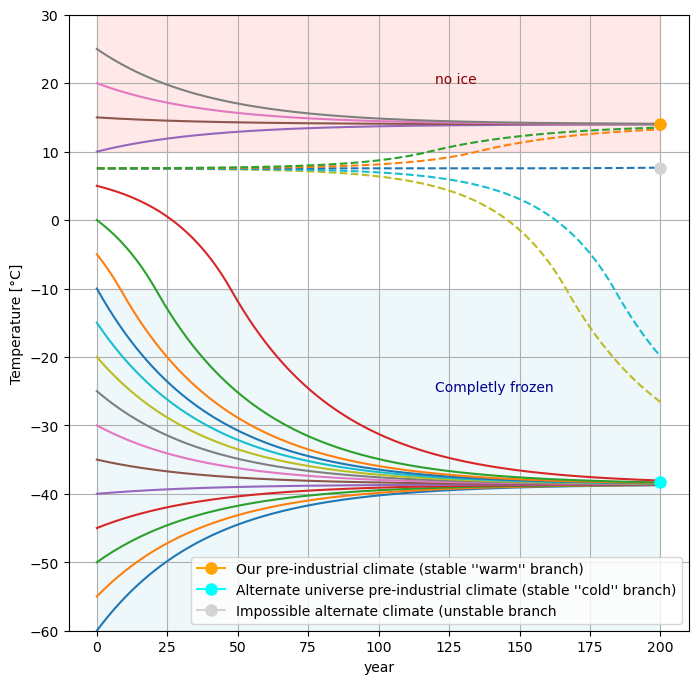

In [4]:
f, (ax) = plt.subplots(1, figsize = (8,8))

for count, T0_sample in enumerate(range(-60, 30, 5)):
    model = ebm(T0_sample, 0, 1., CO2_const)
    model.run(200)
    ax.plot(model.t, model.T)

ax.set_xlabel("year")
ax.set_ylabel("Temperature [°C]")
ax.set_ylim(-60,30)
ax.text(120,-25, s="Completly frozen", size = 10, color = "darkblue")
ax.fill_between([0, 200], y1=-60, y2=-10, color = "lightblue", alpha = 0.2)
ax.fill_between([0, 200], y1=10, y2=30, alpha=0.09, color="red")
ax.text(120,20, s="no ice", size = 10, color = "darkred")

T_un = 7.5472
deltaTs = 1e-2*np.array([-2, -1., 0., 1., 2.])
for deltaT in deltaTs:
    ebm_un = ebm(T_un+deltaT, 0., 1, CO2_const)
    ebm_un.run(200)
    ax.plot(ebm_un.t, ebm_un.T, ls = "--")
    
ax.grid()

ax.plot(200, 14, marker="o", label="Our pre-industrial climate (stable ''warm'' branch)", color="orange", markersize=8)
ax.plot(200, -38.3, marker="o", label="Alternate universe pre-industrial climate (stable ''cold'' branch)", color="aqua", markersize=8)
ax.plot(200, T_un, marker="o", label="Impossible alternate climate (unstable branch", color="lightgrey", markersize=8)
ax.legend(loc=4)

Sustainability - Taking the green road (low challenges to mitigation and adaptation)
The world shifts gradually, but pervasively, toward a more sustainable path, emphasizing more inclusive development that respects perceived environmental boundaries.
Management of the global commons slowly improves, educational and health investments accelerate the demographic transition, and the emphasis on economic growth shifts toward a broader emphasis on human well-being.
Driven by an increasing commitment to achieving development goals, inequality is reduced both across and within countries.
Consumption is oriented toward low material growth and lower resource and energy intensity.
SSP2

Middle of the road - (medium challenges to mitigation and adaptation)
The world follows a path in which social, economic, and technological trends do not shift markedly from historical patterns.
Development and income growth proceeds unevenly, with some countries making relatively good progress while others fall short of expectations.
Global and national institutions work toward but make slow progress in achieving sustainable development goals.
Environmental systems experience degradation, although there are some improvements and overall the intensity of resource and energy use declines.
Global population growth is moderate and levels off in the second half of the century.
Income inequality persists or improves only slowly and challenges to reducing vulnerability to societal and environmental changes remain.
SSP3

Regional rivalry - A rocky road (high challenges to mitigation and adaptation)
A resurgent nationalism, concerns about competitiveness and security, and regional conflicts push countries to increasingly focus on domestic or, at most, regional issues.
Policies shift over time to become increasingly oriented toward national and regional security issues.
Countries focus on achieving energy and food security goals within their own regions at the expense of broader-based development.
Investments in education and technological development decline.
Economic development is slow, consumption is material-intensive, and inequalities persist or worsen over time.
Population growth is low in industrialized countries and high in developing countries.
A low international priority for addressing environmental concerns leads to strong environmental degradation in some regions.
SSP4

Inequality - A road divided (low challenges to mitigation, high challenges to adaptation)
Highly unequal investments in human capital, combined with increasing disparities in economic opportunity and political power, lead to increasing inequalities and stratification both across and within countries.
Over time, a gap widens between an internationally-connected society that contributes to knowledge- and capital-intensive sectors of the global economy, and a fragmented collection of lower-income, poorly educated societies that work in a labor intensive, low-tech economy.
Social cohesion degrades and conflict and unrest become increasingly common.
Technology development is high in the high-tech economy and sectors.
The globally connected energy sector diversifies, with investments in both carbon-intensive fuels like coal and unconventional oil, but also low-carbon energy sources. Environmental policies focus on local issues around middle and high income areas.
SSP5

Fossil-fueled development - Taking the highway (high challenges to mitigation, low challenges to adaptation)
This world places increasing faith in competitive markets, innovation and participatory societies to produce rapid technological progress and development of human capital as the path to sustainable development.
Global markets are increasingly integrated.
There are also strong investments in health, education, and institutions to enhance human and social capital.
At the same time, the push for economic and social development is coupled with the exploitation of abundant fossil fuel resources and the adoption of resource and energy intensive lifestyles around the world.
All these factors lead to rapid growth of the global economy, while global population peaks and declines in the 21st century.
Local environmental problems like air pollution are successfully managed.
There is faith in the ability to effectively manage social and ecological systems, including by geo-engineering if necessary.

In [27]:
datapath = "https://raw.githubusercontent.com/florianboergel/climateoftheocean/main/data/graph.txt"
temp = pd.read_csv(datapath, header = None,
                   skiprows=5, index_col=0,
                   delimiter="     ")
temp = temp + 14.15

CO2_url = "https://raw.githubusercontent.com/florianboergel/climateoftheocean/main/data/monthly_in_situ_co2_mlo.csv"
co2_data = pd.read_csv(CO2_url, header = 58,skiprows=8, index_col=0) 
co2_data = co2_data.iloc[4:] 
co2_data = pd.to_numeric(co2_data.iloc[:,5]) 
co2_data[co2_data<= 0] = np.nan
co2_data.index = pd.to_datetime(co2_data.index, format='%Y')
co2_data = co2_data.groupby(co2_data.index.year).mean() 

/var/folders/38/z0l88jxs5cxc27_d0dp0r78c0000gn/T/ipykernel_57141/776426136.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  temp = pd.read_csv(datapath, header = None,


In [28]:
co2Data = pd.read_csv("/Users/boergel/Documents/work/climateoftheearth/interactiveEBM/ssp/mole-fraction-of-carbon-dioxide-in-air_input4MIPs_GHGConcentrations_AerChemMIP_UoM-AIM-ssp370-lowNTCF-1-2-1_gr1-GMNHSH_2015-2500.csv", index_col=0)

In [29]:
co2Data2024Onwards = co2Data.loc[2024:]


In [41]:
def co2_hist(t):
    return 280 * (1+ ((t-1850)/220)**3)

In [47]:
def co2_hist(t):
    return 280 * (1+ ((t-1850)/220)**3)
co2_hist = co2_hist(np.arange(1850,1958))
co2_hist = pd.Series(co2_hist)
co2_hist.index = np.arange(1850,1958)

In [49]:
co2levels = pd.concat([co2_hist, co2_data, co2Data2024Onwards["data_mean_global"]])

In [50]:
co2levels.shape

(651,)

In [52]:
def CO2_scenario(t):
    return co2levels.values[t]

In [53]:
model = ebm(14, 0, int(1), CO2_scenario)
model.run(651)


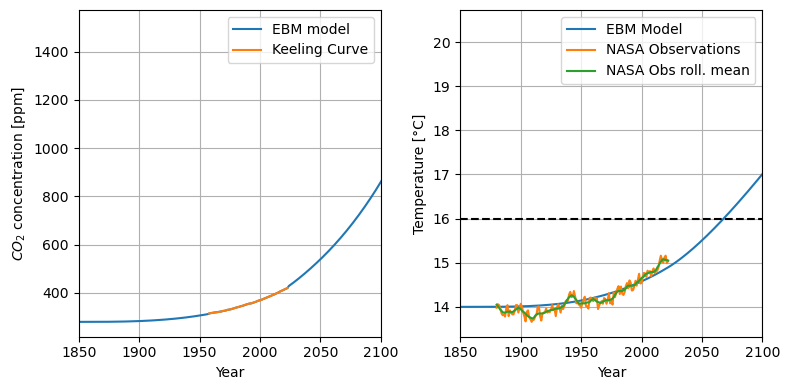

In [54]:
f, (ax, bx) = plt.subplots(1,2, figsize=(8,4))
ax.plot(np.arange(1850, 2501), CO2_scenario(np.arange(0, 651)), label = "EBM model")
ax.plot(co2_data.index, co2_data.values, label="Keeling Curve")
ax.set_ylabel("$CO_2$ concentration [ppm]")
ax.grid()
ax.set_xlabel("Year")
ax.legend()


bx.plot(np.arange(1850, 2502), model.T, label="EBM model")
temp.plot(ax = bx)
bx.set_ylabel("Temperature [°C]")
bx.grid()
bx.legend(["EBM Model", "NASA Observations", "NASA Obs roll. mean"])
bx.set_xlabel("Year")

ax.set_xlim([1850, 2100])
bx.set_xlim([1850, 2100])
bx.axhline(y = 16, label = "Paris Agreement\n threshold (2°C warming)",
           ls="--", color = "black")
f.tight_layout()